# FEATURE ENGINEERING

## Домашняя работа. Использование pandas и numpy для очистки данных.

#### ЗАДАНИЕ: Провести эксплоративный анализ данных на данных недвижимости Бостона, и попытаться обучить линейную модель наиболее качественно.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.datasets import load_boston

In [2]:
data = pd.read_csv(load_boston()['filename'], skiprows=1)

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
# Информация о содержимом датасета
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

#### 1. Посмотрим основные статистики датасета.

In [5]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### 2. Проверим наличие Nan значений в датасете.

In [6]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Поскольку Nan значений в датасете нет, то дополнительной обработки таких ячеек не требуется.

#### 3. Построим гистограммы всех колонок.

<Figure size 720x1080 with 0 Axes>

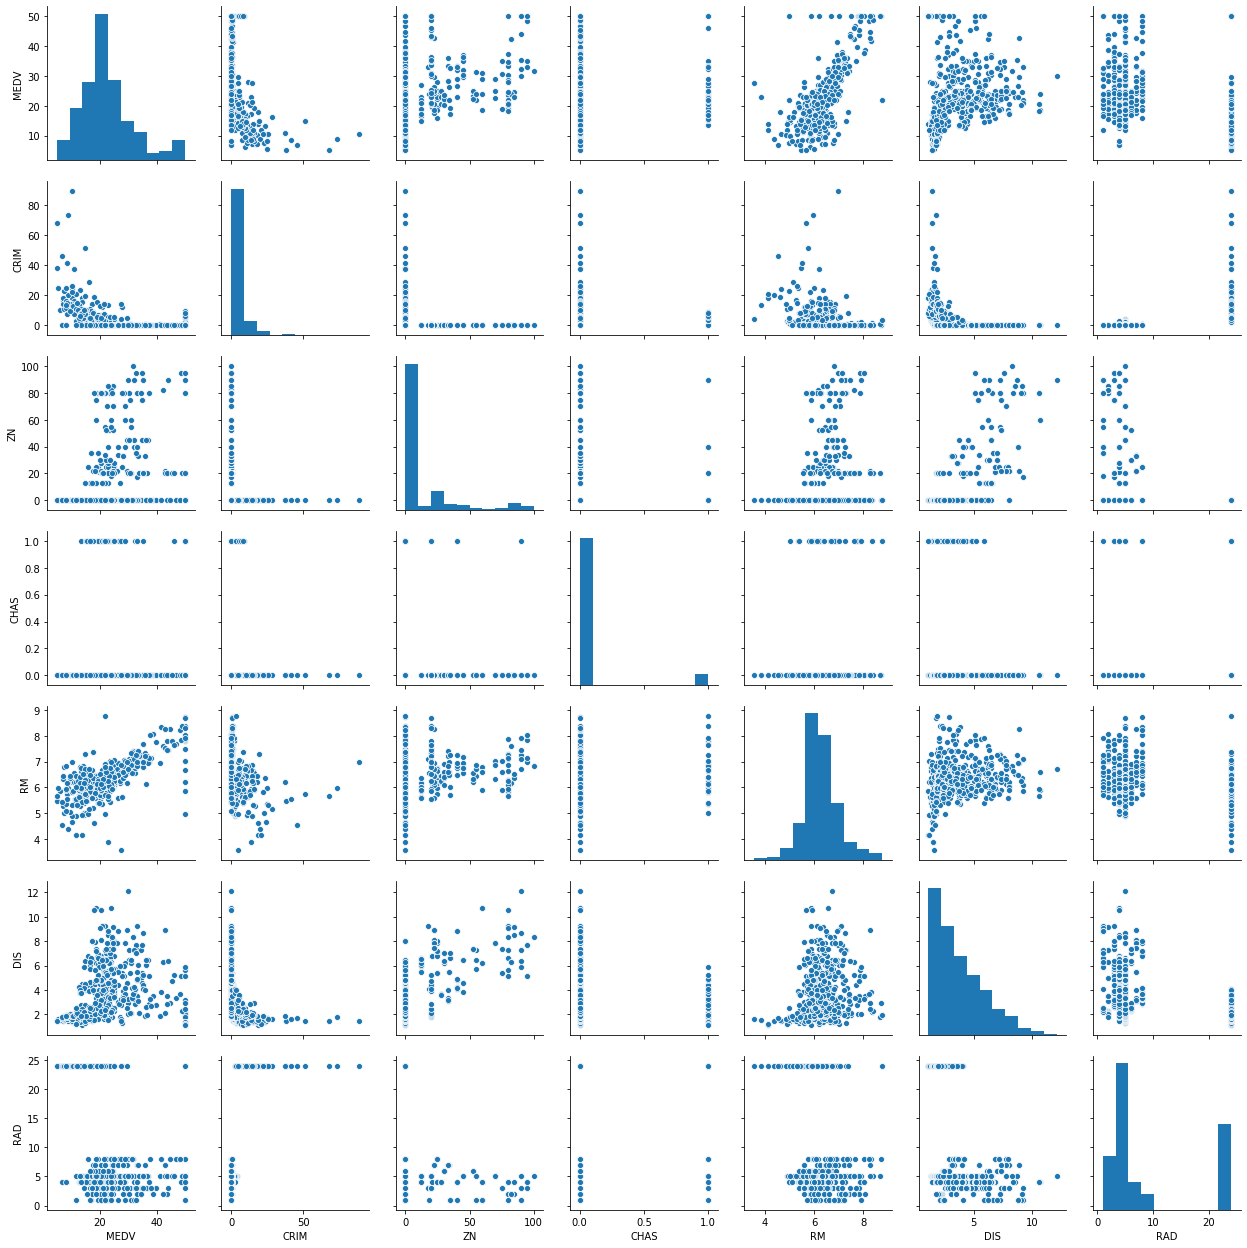

In [7]:
plt.figure(figsize=(10, 15))
sns.pairplot(data[['MEDV', 'CRIM', 'ZN', 'CHAS', 'RM', 'DIS', 'RAD']])
plt.show()

#### 4. Построим распределение целевой переменной MEDV.

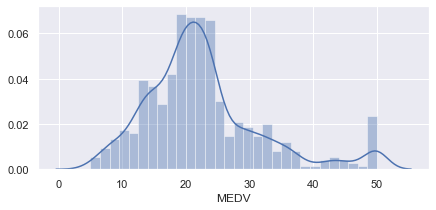

In [8]:
sns.set(rc={'figure.figsize':(7,3)})
sns.distplot(data['MEDV'], bins=30)
plt.show()

Согласно графику значения MEDV имеют нормальное распределение с некоторым количеством выбросов.

#### 5. Построим матрицу корреляций, которая измеряет линейные отношения между переменными.


МАТРИЦА КОРРЕЛЯЦИЙ


(14.0, 0.0)

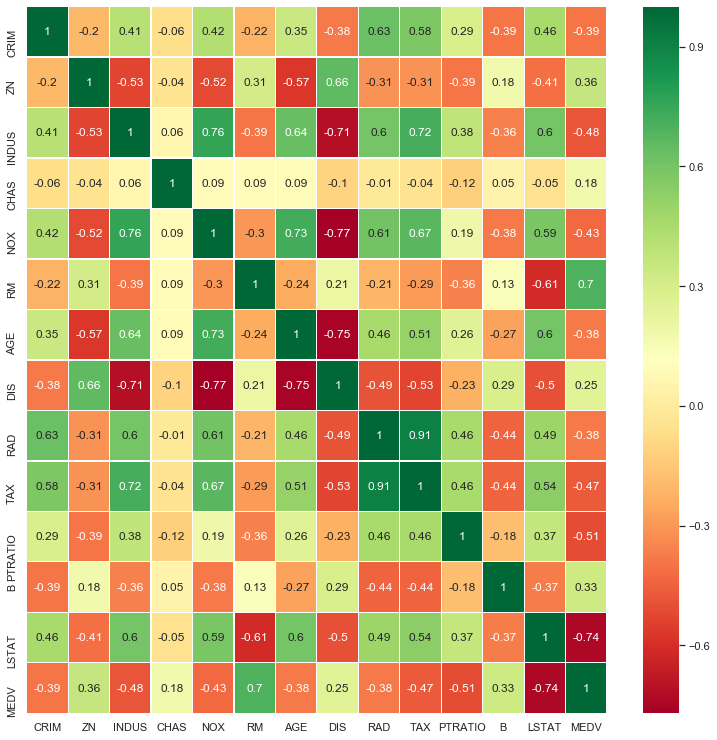

In [9]:
print('\nМАТРИЦА КОРРЕЛЯЦИЙ')
f, ax = plt.subplots(figsize=(13, 13))
corr = np.round_(data.corr(), decimals=2)
sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2)
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)

Коэффициент корреляции варьируется от -1 до 1. Если значение близко к 1, это означает, что между двумя переменными существует сильная положительная корреляция, если значение близко к -1, переменные имеют сильную отрицательную корреляцию.

#### Чтобы применить модель линейной регрессии для обучения, нужно  выбрать те признаки, которые имеют высокую корреляцию с целевой переменной MEDV. 

Согласно полученной матрице корреляции, сильную положительную корреляцию с MEDV (0,7) имеет RM, тогда как высокую отрицательную корреляцию с MEDV (-0,74) имеет LSTAT.

Важным моментом при выборе признаков для модели линейной регрессии является проверка на мультиколлинеарность. Признаки  RAD и TAX имеют корреляцию 0,91, а признаки DIS и AGE - корреляцию -0,75. Эти пары признаков тесно связаны друг с другом, поэтому не нужно выбирать обе эти функции вместе для обучения модели. 

Основываясь на вышеуказанных наблюдениях, будем использовать RM и LSTAT в качестве признаков для обучения модели. 

Используя точечный график, посмотрим, как признаки RM и LSTAT меняются в зависимости от MEDV.

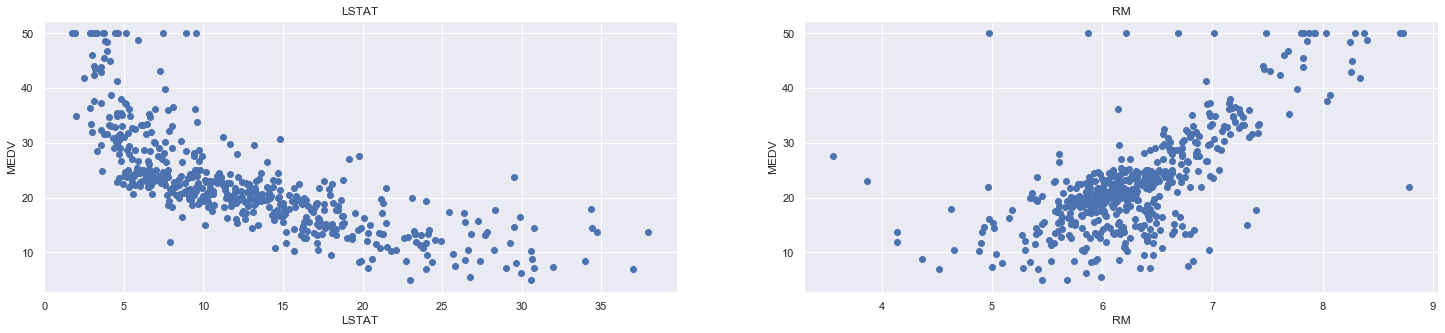

In [10]:
plt.figure(figsize=(25, 5))

features = ['LSTAT', 'RM']
target = data['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = data[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

Согласно графику, цена имеет тенденцию к снижению с ростом LSTAT и тенденцию к росту по мере линейного увеличения RM, при этом существует несколько выбросов.

#### 5. Подготовка данных для обучения модели.

Для обучения модели в переменной 'Х' сохраним те  параметры, на основе которых мы будем предсказывать - 'LSTAT' и 'RM', а в переменной 'y' - предсказываемый параметр 'MEDV'.

In [11]:
X = data.drop(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'MEDV'], axis=1)
y = data['MEDV']

Разделим выборку на две части: тренировочную и тестовую. Размер тестовой выборки - 30%.

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30) # , random_state=5

Напечатаем размеры тренировочной и тестовой выборки, чтобы проверить, правильно ли произошло разделение.

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 2)
(152, 2)
(354,)
(152,)


Прежде чем приступать к обучению модели, нужно выполнить 'центровку' и 'стандартизацию' данных путём их масштабирования. Масштабирование выполняется из-за того, что разные величины выражены в разных единицах измерения.

In [14]:
from sklearn.preprocessing import StandardScaler

stand_scaler = StandardScaler()

# Маштабирование входных параметров
X_train_scaled = stand_scaler.fit_transform(X_train)
X_test_scaled = stand_scaler.transform(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

#### 6. Обучение модели.

Далее произведем обучение модели. Используем LinearRegression для обучения модели как на тренировочном, так и на тестовом датасете. Затем проанализируем среднюю абсолютную ошибку (MAE) -  это метрика, измеряющая среднюю сумму абсолютной разницы между фактическим и прогнозируемым значением.

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# инициализация модели
lin_reg = LinearRegression()

# обучение модели
lin_reg.fit(X_train_scaled, y_train)

# средняя абсолютная ошибка модели
train_predict = lin_reg.predict(X_train_scaled)
test_predict = lin_reg.predict(X_test_scaled)

print('Train MAE: {}'.format(mean_absolute_error(train_predict, y_train)))
print('Test MAE: {}'.format(mean_absolute_error(test_predict, y_test)))

Train MAE: 3.914721837132099
Test MAE: 3.911263556905874


По итогам обучения модели, получили, что MAE составляет около 15%.

Также можно оценить модель с использованием RMSE и R2-показателя.

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lin_model = LinearRegression()

# обучение модели
lin_model.fit(X_train, y_train)

# модель на тренировочных данных 
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("Модель на тренировочных данных")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# модель на тестовых данных
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("Модель на тестовых данных")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

Модель на тренировочных данных
--------------------------------------
RMSE is 5.502818339938205
R2 score is 0.635653401625126


Модель на тестовых данных
--------------------------------------
RMSE is 5.635250346699434
R2 score is 0.6353282203973698


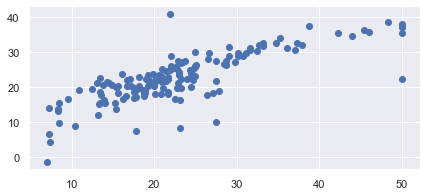

In [17]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.scatter(y_test, y_test_predict)
plt.show()

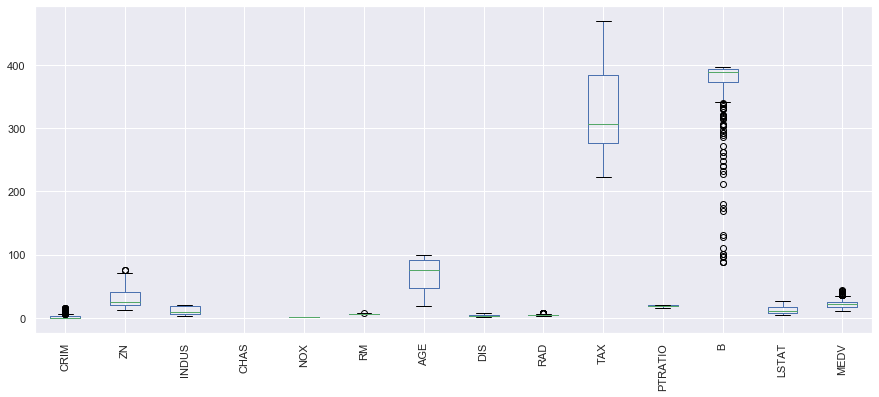

In [18]:
low = .05
high = .95
quant_df = data.quantile([low, high])

filt_df = data.apply(lambda x: x[(x>quant_df.loc[low,x.name]) & 
                                    (x < quant_df.loc[high,x.name])], axis=0)

boxplot = filt_df.boxplot(figsize=(15,6), rot=90)

Для сравнения проведем обучение модели на всем датасете.

In [19]:
from sklearn.preprocessing import StandardScaler

stand_scaler = StandardScaler()

# Маштабирование входных параметров
X_train_scaled = stand_scaler.fit_transform(X_train)
X_test_scaled = stand_scaler.transform(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import recall_score

# инициализация модели
model_rf = RandomForestRegressor()  #(n_estimators=100)  sklearn.ensemble.RandomForestRegressor

# обучение модели
model_rf.fit(X_train_scaled, y_train)

# проверка точности модели на тренировочных данных
print('Точность модели Random Forest на тренировочных данных:', model_rf.score(X_train_scaled, y_train))

Точность модели Random Forest на тренировочных данных: 0.9657951220352581


In [21]:
# точность модели на тестовых данных
from sklearn.metrics import classification_report

model_rf_pred = model_rf.predict(X_test_scaled)
# print(classification_report(y_test, model_rf_pred))
print('Точность модели Random Forest на тестовых данных:', model_rf.score(X_test_scaled, y_test))

Точность модели Random Forest на тестовых данных: 0.6963609915273961


In [22]:
X = data.drop(['MEDV'], axis=1)
y = data['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [23]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

train_predict = lin_reg.predict(X_train)
test_predict = lin_reg.predict(X_test)

print('Train MAE: {}'.format(mean_absolute_error(train_predict, y_train)))
print('Test MAE: {}'.format(mean_absolute_error(test_predict, y_test)))

Train MAE: 3.188886169082581
Test MAE: 3.623479896661347


In [24]:
sort_ind = np.argsort(np.abs(lin_reg.coef_))[::-1]
for x,y in zip(lin_reg.coef_[sort_ind], X.columns[sort_ind]):
    print('{}: {}'.format(x, y))

-19.453841358815563: NOX
4.164965832210963: CHAS
3.833940679852844: RM
-1.650802084674875: DIS
-0.8417989698291773: PTRATIO
-0.4527622692154399: LSTAT
0.2732664519353758: RAD
-0.11245813598205127: CRIM
0.05141606906760864: ZN
-0.01907082415040637: INDUS
-0.010994663482686025: TAX
0.009009092092110203: B
-0.00495105257061674: AGE


MAE для варианта обучения модели на всем исходном датасете оказалась меньше, чем при обучении только на двух параметрах - RM и LSTAT. Для получения более точных результатов нужно проовести сравнительный анализ разных моделей обучения.